
## Assignment one 
### Visual Analytics
February 2021

_Marie Damsgaard Mortensen_

Basic scripting with Python

Create or find small dataset of images, using an online data source such as Kaggle. At the very least, your dataset should contain no fewer than 10 images.



Write a Python script which does the following:

- For each image, find the width, height, and number of channels
- For each image, split image into four equal-sized quadrants (i.e. top-left, top-right, bottom-left, bottom-right)
- Save each of the split images in JPG format
- Create and save a file containing the filename, width, height for all of the new images.


General instructions
- For this exercise, you can upload either a standalone script OR a Jupyter Notebook
- Save your script as basic_image_processing.py OR basic_image_processing.ipynb
- If you have external dependencies, you must include a requirements.txt
- You can either upload the script here or push to GitHub and include a link - or both!
- Your code should be clearly documented in a way that allows others to easily follow the structure of your script.
- Similarly, remember to use descriptive variable names! A name like width is more readable than w.
- The filenames of the split images should clearly relate to the original image.


Purpose

- This assignment is designed to test that you have a understanding of:
- how to structure, document, and share a Python script
- how to effectively make use of basic functions in cv2
- how to read, write, and process images files.

In [1]:
# Firstly, I'm importing modules appropriate for the different tasks
import os # Handling paths
import numpy as np # For numerical operation - abbreviation to save keystrokes
import cv2 # Reading images 

### Metadata
I have downloaded the Stanford dog set from Kaggle and saved the folder with the breed "Collie" (https://www.kaggle.com/jessicali9530/stanford-dogs-dataset). One example of such a picture is provided below.

Firstly, I will import modules needed for the assignment. 

Afterwards I will be defining the functions needed for finding pixels, splitting the picture and saving the new images and information about these. 

Lastly, all functions are collected within a loop that lists all files and performs the functions on each file.

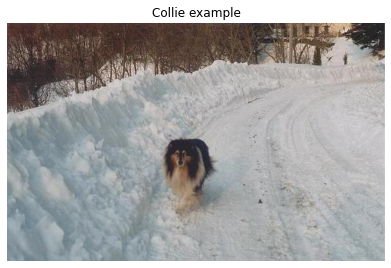

In [4]:
# Examples 
single_file = os.path.join("collie_data", "n02106030_16171.jpg") # Path to single file
import sys # To append home dir to path
sys.path.append(os.path.join("..")) # Append home dir

from utils.imutils import jimshow # To show image
collie = cv2.imread(single_file) # Reading image
jimshow(collie, "Collie example") # Presenting image with caption

In [5]:
def img_split(image): # The input here is the original image
    # Taking the different quadrants by selecting half of the height (image.shape[0]) and width (image.shape[1]) and indexes of the image arrays corresponding to e.g. left top/bottom or right top/bottom)
    left_top = image[0:int(image.shape[0]/2), 0:int(image.shape[1]/2)]
    left_bottom = image[int(image.shape[0]/2):int(image.shape[0]), 0:int(image.shape[1]/2)]
    right_top = image[0:int(image.shape[0]/2), int(image.shape[1]/2):int(image.shape[1])]
    right_bottom = image[int(image.shape[0]/2):int(image.shape[0]), int(image.shape[1]/2):int(image.shape[1])]
    img_list = [left_top, left_bottom, right_top, right_bottom] # Saving each quadrant as an element in my list
    return img_list 

Now we have a function that splits the image into four quadrants and saves them in a list and a function that saves information about the images in another list. 
At this point, we need to save each image with a unique name and with a .jpg extension. This is done by looping through every (quadrant) element in the list "img_list". For every element we combine the filepath defined, the filename of the original image and the name specifying whihc quadrant as well as the jpg extension. Afterwards, the file is written. 

In [6]:
def write_img(filepath, filename, img_list, names):
    for image_n in range(len(img_list)): # The function range(len(img_list)) takes the image number rather than the content/image array
        outfile = os.path.join(filepath, f"{filename}_{names[image_n]}.jpg") # Here, image_n is used to define which quadrant name to select in the output file
        cv2.imwrite(outfile, img_list[image_n]) # Writing the file 
    return(print("sucess - all images saved!")) 




Lastly, a function to save the information is needed. Here, we use filename and image to calulate pixels for all the quadrants and save these as .txt files

In [7]:
def img_info(image, filename, filepath): # The input is the entire image before splitted into quadrants 
    info_str = f"The four quadrants in the image with filename {filename} has a height of {int(image.shape[0]/2)} pixels and a width of {int(image.shape[1]/2)} pixels" # Using formatted stirngs to show pixel information in each original collie image
    outpath = os.path.join(f"{filepath}", f"pixel_info_{filename}.txt") # Specifying which output file should be made
    with open(outpath,  "w", encoding = "utf-8") as file:
        file.write(info_str)
    return(print("pixel info saved!"))

To put it all together, I will now attempt to list all filenames in my dog-folder 

In [10]:
from pathlib import Path

In [11]:
os.mkdir("collie_output") # New directory for output quadrant .png files and .txt files - N.B. This should only run once!

FileExistsError: [Errno 17] File exists: 'collie_output'

In [12]:
filepath = os.path.join("collie_data") # Specifying path
names = ["left_top", "left_bottom", "right_top", "right_bottom"] # Specifying quadrant names for output files
filepath_out = os.path.join("collie_output") # Path for output files  

In [13]:
for filename in Path(filepath).glob("*.jpg"): # Takes every file with .jpg extension (which is the extension the collie images have)
    image = cv2.imread(str(filename)) # Reads file and saves as image
    print(f"Height is {image.shape[0]} pixels")
    print(f"Width is {image.shape[1]} pixels")
    print(f"There are {image.shape[2]} color channels")
    filename_new = os.path.splitext(os.path.basename(filename))[0] # Removing both path and extension with this
    img_info(image, filename_new, filepath_out) # Saves image info as txt file 
    img_list = img_split(image) # Splits into quadrants
    write_img(filepath_out, filename_new, img_list, names) # Using previously defined function to save files

Height is 480 pixels
Width is 447 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 375 pixels
Width is 500 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 374 pixels
Width is 500 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 315 pixels
Width is 400 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 375 pixels
Width is 500 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 600 pixels
Width is 800 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 330 pixels
Width is 500 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 400 pixels
Width is 300 pixels
There are 3 color channels
pixel info saved!
sucess - all images saved!
Height is 448 pixels
Width is 500 pixels
There are 3 color channels
pixel info saved!
sucess - a